# Logistic Regression

[I 2025-04-03 14:24:28,815] A new study created in memory with name: no-name-6f5f003c-37c6-40e2-b72d-6179ec2fee9b
[I 2025-04-03 14:25:23,425] Trial 0 finished with value: 0.39191869651683947 and parameters: {'C': 26.010471763188242, 'penalty': 'l1', 'solver': 'saga', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.39191869651683947.
[I 2025-04-03 14:25:23,427] Trial 1 pruned. 
[I 2025-04-03 14:25:23,428] Trial 2 pruned. 
/home/er133/miniconda3/envs/JS/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
[I 2025-04-03 14:25:37,549] Trial 3 finished with value: 0.39793929458048766 and parameters: {'C': 0.42912908497325414, 'penalty': 'l1', 'solver': 'liblinear', 'class_weight': None}. Best is trial 3 with value: 0.39793929458048766.
[I 2025-04-03 14:25:40,981] Trial 4 finished with value: 0.3978984110719229 and parameters: {'C': 5.82333285



 Best Score is 0.39803018654791766


 Best Hyperparameters are {'C': 0.02029972422199162, 'penalty': 'l2', 'solver': 'liblinear', 'class_weight': None}


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     83392
           1       0.56      0.23      0.33      5022

    accuracy                           0.95     88414
   macro avg       0.76      0.61      0.65     88414
weighted avg       0.93      0.95      0.94     88414



,Coefficient
HadAngina_Yes,1.114081
AgeCategory_Age 80 or older,0.879390
AgeCategory_Age 75 to 79,0.685600
AgeCategory_Age 70 to 74,0.588796
AgeCategory_Age 65 to 69,0.457116
...,...
GeneralHealth_Excellent,-0.540176
AgeCategory_Age 30 to 34,-0.706940
AgeCategory_Age 25 to 29,-0.798157
AgeCategory_Age 18 to 24,-0.955060


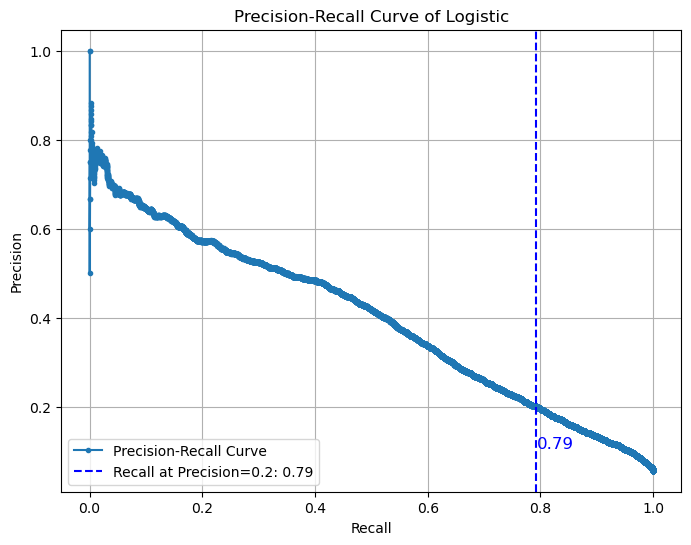

,feature,importance_mean,importance_std
6,HadAngina,0.215766,2.468764e-03
25,AgeCategory,0.031970,1.310784e-03
1,Sex,0.028473,1.193740e-03
7,HadStroke,0.019669,1.219668e-03
2,GeneralHealth,0.014328,2.035206e-03
5,RemovedTeeth,0.005814,5.544398e-04
23,ChestScan,0.005794,1.483699e-03
21,SmokerStatus,0.005602,8.565348e-04
14,HadDiabetes,0.004177,9.137916e-04
3,LastCheckupTime,0.001079,3.621931e-04


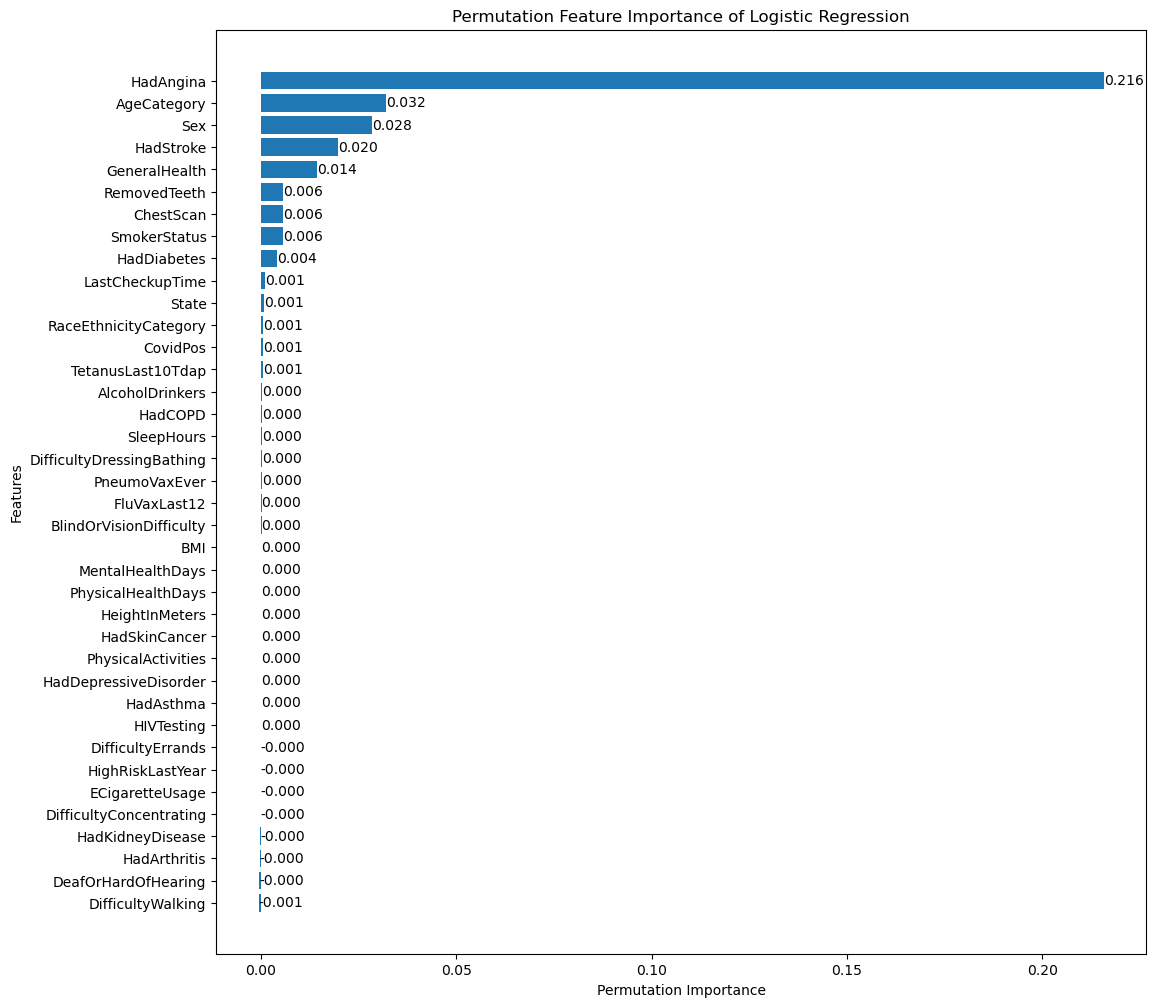

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import average_precision_score,precision_recall_curve,classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from copy import deepcopy
import random

# Set random seed for reproducablility
seed = 88888
np.random.seed(seed=seed)
random.seed(a=seed)

# Data preprocess. Using mode to fill categorical features. Using mean to 
# fill categorical features.
target = 'HadHeartAttack'
df = pd.read_csv('heart_2022_with_nans.csv').dropna(subset=target)
X = df.drop(columns=[target, 'WeightInKilograms'])
y = df[target]
categoryFeatures = X.select_dtypes(include='object').columns.tolist()
numericalFeatures = X.select_dtypes(exclude='object').columns.tolist()
X = X[categoryFeatures + numericalFeatures]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed, stratify=y
    )
for col in categoryFeatures:
    fill = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(fill)
    X_test[col] = X_test[col].fillna(fill)
for col in numericalFeatures:
    fill = X_train[col].mean()
    X_train[col] = X_train[col].fillna(fill)
    X_test[col] = X_test[col].fillna(fill)
# Copy a X_test for permutation importance
X_permutaion = deepcopy(X_test)

# Using One-Hot encoding to process cetegorical features. Using
# standardscaler to standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('categories', OneHotEncoder(), categoryFeatures),
        ('numberics', StandardScaler(), numericalFeatures)
    ]
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)    
# Using optuna to tune hyperparameters
import optuna
sampler=optuna.samplers.TPESampler(seed=seed)

def logistic_search(trial):
    # C stand for inverse of the regularization strength
    C = trial.suggest_float('C', 1e-4, 1e4, log=True)
    # Determine what kinds of regularization algorithm to be applied
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    # Algorithm to find best coefficients.
    solver = trial.suggest_categorical('solver',['liblinear', 'saga', 'lbfgs', 'sag', 'newton-cg'])
    # Mitigate effects of imbalanced data
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    # Logisitic Regression doen not allow certain combination of penalty methods and
    # solvers. When encounter such combinations, tell optuna to skip this trials
    if (penalty == 'l1' and solver not in ['liblinear', 'saga']) or (
        penalty == 'l2' and solver not in ['liblinear', 'saga', 'lbfgs', 'sag', 'newton-cg']
        ):
        raise optuna.exceptions.TrialPruned()
    
    # Instantiate logistic model
    logistic_model = LogisticRegression(
        penalty=penalty,
        C=C,
        class_weight=class_weight,
        solver=solver,
        random_state=seed,
        max_iter=1000,
        n_jobs=-1
    )
    logistic_model.fit(X_train, y_train)
    
    probs = logistic_model.predict_proba(X_test)[:,1]
    score = average_precision_score(y_test, probs)
    return score

logistic_study = optuna.create_study(direction='maximize', sampler=sampler)
logistic_study.optimize(logistic_search, n_trials=100)
# Train model with beat hyperparamters
logistic_model = LogisticRegression(**logistic_study.best_params,
                                    random_state=seed,
                                    max_iter=1000,
                                    n_jobs=-1)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_probs = logistic_model.predict_proba(X_test)
logistic_score = average_precision_score(y_test, logistic_probs[:,1])
print(f'\n\n Best Score is {logistic_score}')
# Show best hyperparameters
print(f'\n\n Best Hyperparameters are {logistic_study.best_params}\n\n')
print(classification_report(y_test, logistic_pred))
# Show coefficients founded
coef = pd.DataFrame(data=logistic_model.coef_.T, index=preprocessor.named_transformers_['categories'].get_feature_names_out(categoryFeatures).tolist() + numericalFeatures, columns=['Coefficient'])
display(coef.sort_values('Coefficient', ascending=False))
# Calculate precision, recall, thresholds matrix, and plot them out. 
# Adding a vertical line shows value of recall when precision is 0.2.
precision, recall, thresholds = precision_recall_curve(y_test, logistic_probs[:,1])
# Find the index where precision is closet to 0.2
idx = np.argmin(np.abs(precision - 0.2))
recall_at_precision_02 = recall[idx]
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.axvline(x=recall_at_precision_02, color='b', linestyle='--', label=f'Recall at Precision=0.2: {recall_at_precision_02:.2f}')
plt.text(recall_at_precision_02, 0.1, f'{recall_at_precision_02:.2f}', color='b', fontsize=12, verticalalignment='bottom')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Logistic')
plt.legend()
plt.grid()
plt.show()
# Wrap logistic model with data preprocess for permutation importance
from sklearn.base import ClassifierMixin
class wrapLogistic(ClassifierMixin):
    def __init__(self, model, preprocessor):
        self.model = model
        self.preprocessor = preprocessor
        self.classes_ = model.classes_

    def fit(self, X, y=None):
        return self
    
    def predict_proba(self, X):
        X = preprocessor.transform(X)
        return self.model.predict_proba(X)
    
    def predict(self, X):
        X = preprocessor.transform(X)
        return self.model.predict(X)
    

wrapLogisticModel = wrapLogistic(logistic_model, preprocessor)

# Permutation importance
from sklearn.inspection import permutation_importance
logistic_importance = permutation_importance(
    estimator=wrapLogisticModel, 
    X=X_permutaion, 
    y=y_test,
    n_repeats=10,
    random_state=seed,
    scoring='average_precision'
    )

# Transform results of permutation_importance to dataframe for plot and sort
logistic_importance_df = pd.DataFrame({
    'feature': categoryFeatures + numericalFeatures,
    'importance_mean': logistic_importance.importances_mean,
    'importance_std': logistic_importance.importances_std
})

logistic_importance_df = logistic_importance_df.sort_values(by='importance_mean', ascending=False)
display(logistic_importance_df)

# Plot a picture to visualize ferture importance
plt.figure(figsize=(12, 12))
bars = plt.barh(logistic_importance_df['feature'], logistic_importance_df['importance_mean'])
for bar in bars:
    plt.text(bar.get_width(),
             bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.3f}',
             va='center')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importance of Logistic Regression')
# Make most important feature show on the top
plt.gca().invert_yaxis()
plt.show()